## ML Classification Models 

### This will cover:
- K Means
- Decision Tree
- SVM
- Logistic Regression


### Pre-requisites: 
- The data is loaded and processed
- X and y are defined
- Data is split between training and testing (we will however do this again)


## Pre-requisites
## Sample Dataset
1. Data Processing 
2. Splitting the test and train

This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

#### 1. Import the package, import the dataset, read the dataset

In [1]:
#import the packages
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#import the dataset
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
    
#read the dataset
df = pd.read_csv('loan_train.csv')

--2022-01-03 19:30:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-01-03 19:30:33 (183 MB/s) - ‘loan_train.csv’ saved [23101/23101]



#### Data processing; change the format, set the features, define x and y

In [2]:
# data processing      -> you can see more about this step in the ML basics notebook

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace = True)
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X = preprocessing.StandardScaler().fit(Feature).transform(Feature)
X [0:5]
y = df['loan_status'].values
y [0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#### 2. Test and train

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


---
# K Means (K Nearest Neighbor) 

#### Model and prediction 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# see the code below to see how I determined that 7 was the best K value
k = 7                                                                      # This is the number of clusters. See section 'How to find the best value for K' below to see why we decided on 7
knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)     # X_train and y_train come from the dataset splitting above in pre-requisites
yhat = knn_model.predict(X_test)                                           # This is the line that predicts the values using X_test and we call it yhat
yhat [0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#### How to find the best value for K

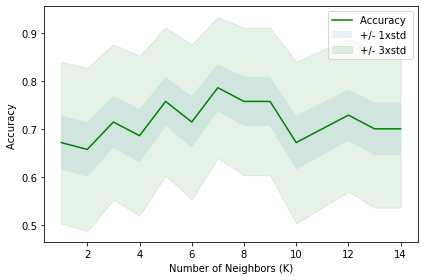

The best accuracy was with 0.7857142857142857 with k= 7


In [10]:
# code to determine the best value for K
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

#----- 
#plot to show the best K

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)     # You can also see that the K with the highest accuracy is 7, it starts going down after that


#### Accuracy 

In [13]:
# Using our normal split dataset
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#Jaccard
knn_jaccard = jaccard_score(y_test, yhat, pos_label='PAIDOFF')

#F1
knn_f1_score = f1_score(y_test, yhat, average='weighted') 

print("KNN Jaccard score is:", knn_jaccard)
print("KNN F1 score is: ", knn_f1_score)


KNN Jaccard score is: 0.676923076923077
KNN F1 score is:  0.7034625628884287


In [ ]:
# # THIS CELL WONT RUN, JUST AN EXAMPLE
# #Using a new test dataset 
# yhat_test = knn_model.predict(testing_set_X)                 # This is the line for a prediction so we can copy it and change the dataset. We would first need to import it and run it

# #Jaccard and F1
# knn_jaccard_test = jaccard_score(testing_set_y, yhat_test, pos_label='PAIDOFF')
# knn_f1_score_test = f1_score(testing_set_y, yhat_test, average='weighted') 

---- 
# Decision Tree

#### Model and prediction

In [ ]:
    # model, prediction, accuracy
#model
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
loanTree                               # it shows the default parameters

loanTree.fit(X_train,y_train)

#prediction
predTree = loanTree.predict(X_test)
print (predTree [0:5])              
print (y_test [0:5])                  # see the 'Vizualization' cells to see a visual representation, this is not 100% necessary

#### Accuracy

In [ ]:
# Using our normal split dataset
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

#or

#jaccard
tree_jaccard = jaccard_score(y_test, predTree, pos_label = 'PAIDOFF')
#F1
tree_f1_score = f1_score(y_test, predTree, average='weighted')

print("decision Tree Jaccard score is:", tree_jaccard)
print("decision Tree F1 score is: ", tree_f1_score)

In [ ]:
# # THIS CELL WONT RUN, JUST AN EXAMPLE
# #Using a new test dataset 
# yhat_test = predTree.predict(testing_set_X)                 # This is the line for a prediction so we can copy it and change the dataset. We would first need to import it and run it

# #Jaccard and F1
# tree_jaccard_test = jaccard_score(testing_set_y, yhat_test, pos_label='PAIDOFF')
# tree_f1_score_test = f1_score(testing_set_y, yhat_test, average='weighted')